# Trabajo Final. Análisis de Datos

## Alumnos:

### Domenje, Carlos R.

### Fux, Santiago.

---

## DATASET: Uso de Taxis Yellow Cab en USA en el año 2020

**Problema.** Responderemos a la siguiente pregunta

1. ¿Existe una manera de caracterizar los lugares más recurrentes para inicio / fin de viaje?


## 1. Obtención de datos

Para importar los datos, buscamos en la página web brindada por la cátedra:

- [Yellow Cab - Dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

**Nota**: El dataset utilizado será el del año 2020, los tres primeros meses (Enero, Febrero, Marzo) y será descargado en una carpeta llamada "data" dentro de la carpeta contenedora del proyecto.

In [23]:
# Path del dataset a utilizar.
DATASET_PATH = r'./data'

In [24]:
# listamos los archivos que se encuentran en el path
!ls {DATASET_PATH}

yellow_tripdata_2020-01.parquet yellow_tripdata_2020-03.parquet
yellow_tripdata_2020-02.parquet


In [35]:
# Importamos las librerias necesarias para interactuar con el dataset.

import pandas as pd
import glob
import matplotlib
import matplotlib.pyplot as plt



# Set decimals format with 3 decimals
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [36]:
# El archivo del dataset tiene como formato .parquet, el cual es un archivo que esta orientado a columnas. 
all_files = glob.glob("./data/*.parquet")

dataframe_list = []

for filename in all_files:
    df = pd.read_parquet(filename)
    dataframe_list.append(df)


dataframe = pd.concat(dataframe_list, axis=0, ignore_index=True)

# Para obtener una primer aproximación de cada columna, 
# podemos utilizar la funcion head, que nos mostrará las 5 primeras filas con sus respectivas columnas del dataset
dataframe.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.000,4.700,1.000,N,88,255,1,22.000,3.000,0.500,2.000,0.000,0.300,27.800,2.500,None
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.000,0.000,1.000,N,193,193,2,2.500,0.500,0.500,0.000,0.000,0.300,3.800,0.000,None
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.000,1.100,1.000,N,246,90,1,6.000,3.000,0.500,1.950,0.000,0.300,11.750,2.500,None
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.000,0.870,1.000,N,151,238,1,5.000,0.500,0.500,1.760,0.000,0.300,10.560,2.500,None
4,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0.000,4.400,1.000,N,79,261,1,16.500,3.000,0.500,4.050,0.000,0.300,24.350,2.500,None


In [37]:
## Para obtener una descripción del tipo de datos que contiene cada columna, utilizamos la funcion info()
# Podemos además, obtener una idea general de cuantos datos no nulos contiene.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [38]:
# La función describe() nos da una vista general de valores de cantidades de datos, media, desv. standard, valores min y max de cada columna.
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6405008.000,6339567.000,6405008.000,6339567.000,6405008.000,6405008.000,6405008.000,6405008.000,6405008.000,6405008.000,6405008.000,6405008.000,6405008.000,6405008.000,6339567.000
mean,1.673,1.515,2.930,1.060,164.732,162.663,1.257,12.694,1.115,0.492,2.189,0.349,0.298,18.663,2.299
std,0.469,1.152,83.159,0.812,65.544,69.913,0.489,12.127,1.260,0.074,2.760,1.767,0.034,14.757,0.702
min,1.000,0.000,-30.620,1.000,1.000,1.000,0.000,-1238.000,-27.000,-0.500,-91.000,-35.740,-0.300,-1242.300,-2.500
25%,1.000,1.000,0.960,1.000,132.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.930,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.800,2.500
max,5.000,9.000,210240.070,99.000,265.000,265.000,5.000,4265.000,113.010,30.800,1100.000,910.500,0.300,4268.300,2.750


### Descripción de Columnas del Dataset.


In [39]:
# Listado de tipos de variables presentes en el dataset
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
dtype: object

In [44]:
# funcion para plotear las distribuciones de los atributos
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=10, ylabelsize=10,figsize=(18,18))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout
    plt.show()
    

# funcion para imprimir nulos
def print_null_info(col):
    print(f'Cantidad de nulos: {col.isnull().sum()}')

# funcion para imprimir datos de v. categoricas
def print_categorical(col):
    print(f'Ordinalidad: {col.unique()}')
    print_null_info(col)
    print('Ocurrencias:')
    print(col.value_counts().sort_values())

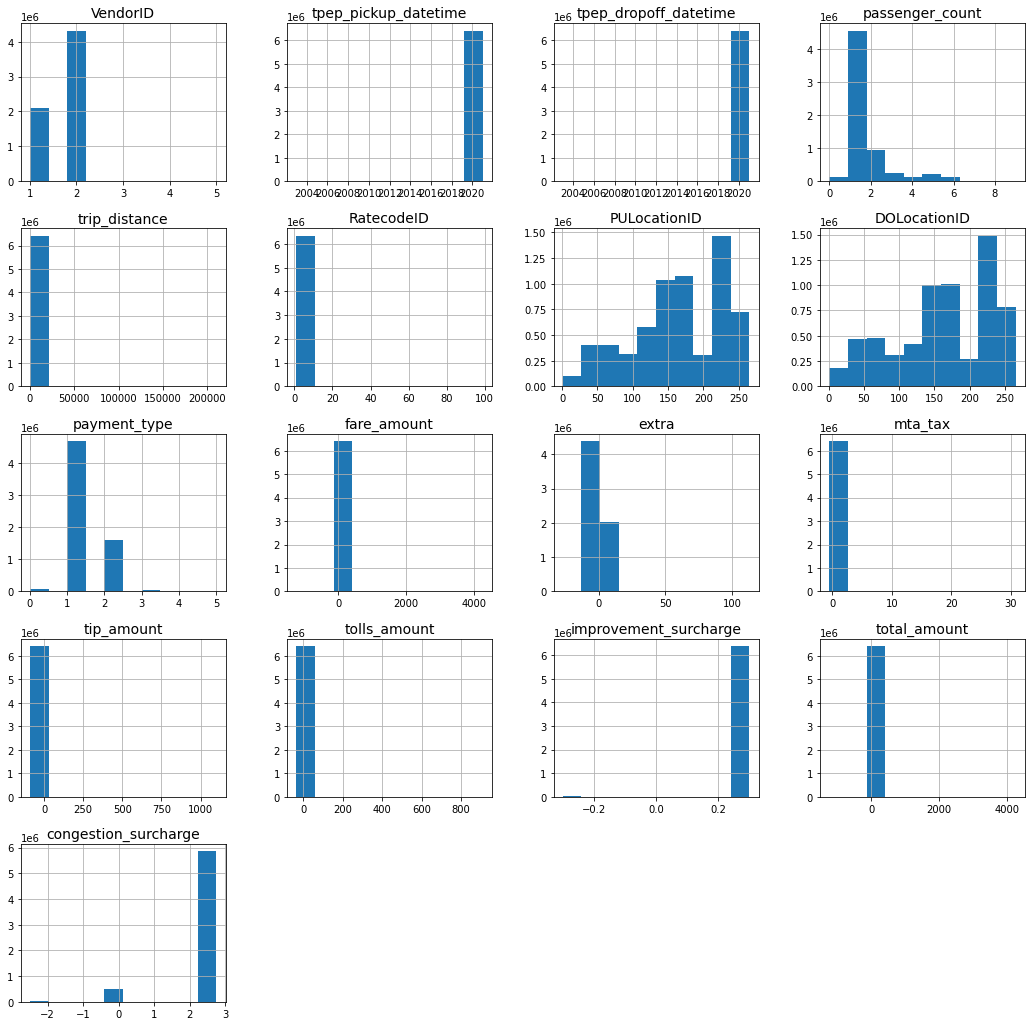

In [45]:
#imprimo distribuciones 
display_dataset_distributions(df)


- **VendorID**: Proveedor de servicios de tecnologias en taxis (T-PEP)
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  


In [46]:
print_categorical(df.VendorID)

Ordinalidad: [1 2 5]
Cantidad de nulos: 0
Ocurrencias:
5          5
1    2094439
2    4310564
Name: VendorID, dtype: int64



- **tpep_pickup_datetime**: Fecha y hora en el cual el reloj fue activado al iniciar un viaje.
    - Tipo de dato: Timestamp compuesto  
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 2020-07-01 00:25:32


In [47]:
print_null_info(df.tpep_pickup_datetime)

Cantidad de nulos: 0


- **tpep_dropoff_datetime**: Fecha y hora en el cual el reloj fue desactivador al finalizar un viaje.
    - Tipo de dato: Timestamp compuesto
    - Tipo de variable: Entrada  / Salida

    - Ejemplo del dato en el dataset: 2020-07-01 00:33:39


In [48]:
print_null_info(df.tpep_dropoff_datetime)

Cantidad de nulos: 0


- **passenger_count**: El número de pasajeros en el vehiculo. (Es un dato que lo ingresa el conductor.)
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada
    - Ejemplo del dato en el dataset: 1.0

In [49]:
print_null_info(df.passenger_count)

Cantidad de nulos: 65441



- **trip_distance**: La distancia del viaje transcurrido en millas reportada por el taxímetro. 
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 1.50


In [50]:
print_null_info(df.trip_distance)

Cantidad de nulos: 0


- **PULocationID**: TLC Zona en la que el taxímetro se activó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida

    - Ejemplo del dato en el dataset: 238


In [51]:
print_categorical(df.PULocationID)

Ordinalidad: [238 239 193   7 246 163 161  43 143 211 234 138 170 236  50 142 237  24
 232  79 233 148 144 229  41  48  95 141  90 166 249  87 113 107 185 162
 189 140 262 263 151 231  40 261 137 158 181 132  68 164 114 125  75 255
 129  93 226 260 209  65 116  74  13 145 224 256 112 264  17 186  42 157
  88   4  45 257 127 152  12 179 243 244  18 119 190  97 100 265 220 153
  66 196  25  80  36  73 135 146  49  47  51  92 136  37 198 202 173  52
  33  76 169  70  56  10 216  77  32  69 108 235   3 225 228 188 126  94
  60 213  89  83  82 254 194  14 159  34  85 168 223  61 167 247 230  67
 106 217 133 160  62 134 165 147 241 191  54 102 174  78  71  22  55 212
  20  63  35  29 215 120 240 195  72 258 208 183  91  53 121  39  19  28
 227 250 155 182   1 242  26 177 197 131  38  16 221 130 219  21 171 200
 180  44  23 117 207   5 139 222 123 206 124 218 101 210   8 248 214  31
  64  11 150 178 203  81  99  46 149 128 205 252 154 156 187 253 118  86
 175  58  98 122  15 192 109 259  96 1


- **DOLocationID**: TLC Zona en la que el taxímetro se desactivó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida 

    - Ejemplo del dato en el dataset: 75


In [52]:
print_categorical(df.DOLocationID)

Ordinalidad: [239 238 151 193  48  79 161 144  25 234  90 142 216 162 262 261 236 141
 112 233 170 107  49 229  41  74  68  95 140 148 213 100 137 263 248 226
   7 237  42  80  24 243 231 246 244 186 143 224  45  65 181 158  82 232
  75 265 145  43 211 125 223 113 134 220 114 249 255 164 129  28 260 153
  87  66 116  55 159   4 189  50  13 163  37 122 256 225  10 218 166 179
 221  17 127 209 264 195  18 168 147  67 106  89  33 138  22 108 173  92
 149 136  97  62 198  78  93 250  14 146  69 160 217  88 200  20 258 188
  72 150 135 165 230  94 196  70 212 152  61 119   6 126 133 169  36  71
 247  40  16 190 121 202 128 205 206 130 227  21  56 191  51  15  19 241
  52 235 208 157 171  83 197  91  32 175 228 219 167 257  47  31 259  35
 203 132 139 124 254  39 210 123  23  76  54 184 177  12  81  64 252  85
 155 178  63 131 215 192  26 102  77  53 185 182   8  86  38   1  29  60
 180 174 242 183 253   3  98  73  11 120  59  30 222  34 245  27   9 240
  57  58 251 117 201 101 176 156 204 1


- **RatecodeID**:  El código de tarifa final vigente al final del viaje.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada  

    - 1= Standard rate
    - 2= JFK 
    - 3= Newark
    - 4= Nassau or Westchester
    - 5= Negotiated fare
    - 6= Group ride


In [53]:
print_categorical(df.RatecodeID)

Ordinalidad: [ 1.  5.  3.  2.  4. 99.  6. nan]
Cantidad de nulos: 65441
Ocurrencias:
6.000          46
99.000        350
4.000        5130
3.000       13476
5.000       36296
2.000      157733
1.000     6126536
Name: RatecodeID, dtype: int64


- **store_and_fwd_flag**:  Este flag indica si el registro de viaje se llevó a cabo en la memoria del dispositivo del vehiculo antes de enviar al proveedor, también conocido como "almacenar y reenviar", porque el vehiculo no tenia conexion al servidor.
    - Tipo de dato: Categórica  
    - Tipo de variable: Entrada  

    - Y= Almacenar y reenviar informacion.
    - N= No almacenar y enviar informacion.


In [54]:
print_categorical(df.store_and_fwd_flag)

Ordinalidad: ['N' 'Y' None]
Cantidad de nulos: 65441
Ocurrencias:
Y      68120
N    6271447
Name: store_and_fwd_flag, dtype: int64



- **payment_type**: Un código numérico que significa cómo el pasajero pagó por el viaje.
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  

    - 1= Credit card
    - 2= Cash
    - 3= No charge
    - 4= Dispute
    - 5= Unknown
    - 6= Voided trip


In [55]:
print_categorical(df.payment_type)

Ordinalidad: [1 2 4 3 5 0]
Cantidad de nulos: 0
Ocurrencias:
5          1
4      18065
3      32770
0      65441
2    1593834
1    4694897
Name: payment_type, dtype: int64


- **fare_amount**: La tarifa de tiempo y distancia calculada por el taxímetro.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 8.0


In [56]:
print_null_info(df.fare_amount)

Cantidad de nulos: 0


- **Extra**: Varios extras y recargos. Actualmente, esto solo incluye los cargos de $0.50 y $1 por la hora pico y por la noche.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5


In [57]:
print_null_info(df.extra)

Cantidad de nulos: 0



- **mta_tax**: Impuesto MTA de $0.50 que se activa automáticamente según la tasa de uso del medidor.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5


In [58]:
print_null_info(df.mta_tax)

Cantidad de nulos: 0


- **improvement_surcharge**: Recargo de mejora de $ 0.30 en viaje en el descenso de bandera. El recargo por mejora comenzó a cobrarse en 2015.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.3


In [59]:
print_null_info(df.improvement_surcharge)

Cantidad de nulos: 0


- **tip_amount**: Importe de la propina: este campo se completa automáticamente para las propinas de tarjetas de crédito. Las propinas en efectivo no están incluidas.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.00  


In [60]:
print_null_info(df.tip_amount)

Cantidad de nulos: 0


- **tolls_amount**: Importe total de todos los peajes pagados en el viaje.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00


In [61]:
print_null_info(df.tolls_amount)

Cantidad de nulos: 0



- **total_amount**: El monto total cobrado a los pasajeros. No incluye propinas en efectivo.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 9.30


In [62]:
print_null_info(df.total_amount)

Cantidad de nulos: 0


- **congestion_surcharge**: Importe total recaudado en el viaje por el recargo por congestión del Estado de Nueva York.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00


In [63]:
print_null_info(df.congestion_surcharge)

Cantidad de nulos: 65441


- **airport_fee**: $1.25 para recoger solo en los aeropuertos LaGuardia y John F. Kennedy
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida
    - Ejemplo del dato en el dataset: None

In [64]:
print_null_info(df.airport_fee)

Cantidad de nulos: 6405008
